KNN MODEL FOR REGRESSION

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [39]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Loaded my dataset
file_path = ("TrainDataset2023.xls")
df = pd.read_excel(file_path)

# separated features and target variable
X = df.drop(columns=['ID', 'pCR (outcome)', 'RelapseFreeSurvival (outcome)'])
y = df['RelapseFreeSurvival (outcome)']

# then I used MinMaxScaler to normalize the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)
X_normalized_df['ID'] = df["ID"]

In [24]:
X_normalized

array([[3.18004279e-01, 0.00000000e+00, 0.00000000e+00, ...,
        6.40530100e-01, 5.02249585e-01, 6.61485847e-04],
       [2.82670470e-01, 1.00000000e+00, 1.00100100e-03, ...,
        1.12285085e-01, 1.65572530e-02, 3.21663673e-03],
       [1.41335235e-01, 0.00000000e+00, 0.00000000e+00, ...,
        8.43978978e-02, 8.71632962e-03, 5.62777067e-03],
       ...,
       [5.35307202e-01, 0.00000000e+00, 0.00000000e+00, ...,
        2.58840257e-02, 6.15718121e-04, 2.01691946e-01],
       [8.09144220e-01, 1.00000000e+00, 0.00000000e+00, ...,
        1.89627358e-01, 6.08583858e-02, 1.19411272e-03],
       [4.06338800e-01, 1.00000000e+00, 0.00000000e+00, ...,
        6.55265187e-02, 5.12093091e-03, 1.97941277e-02]])

In [40]:
# train-test split part
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_normalized_df, y, test_size=0.3, random_state=0)

Mean Absolute Error: 25.77662037037037
R-squared: -0.18574579087432475


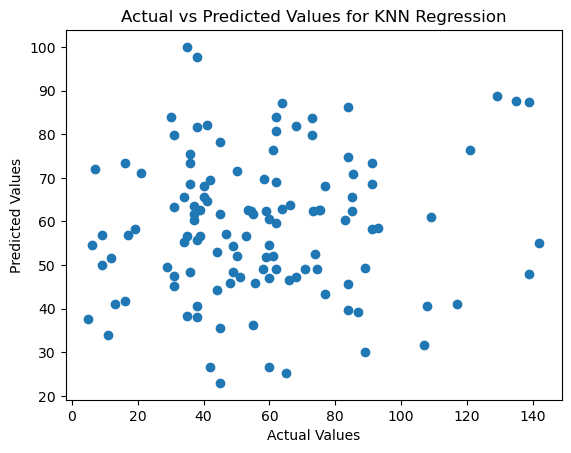

In [42]:
# standardized the features. it is recommended for KNN so i calculated
from sklearn.preprocessing import StandardScaler

# the value of k it represents number of neighbors
k_value = 3  

# the KNN regressor model
knn_regressor = KNeighborsRegressor(n_neighbors=k_value)

# trained the model
knn_regressor.fit(X_train_scaled.loc[:, X_train_scaled.columns != 'ID'], y_train)

# predictions on the test set
y_pred = knn_regressor.predict(X_test_scaled.loc[:, X_test_scaled.columns != 'ID'])


mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r_squared}')

# Plotting the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for KNN Regression')
plt.show()


In [43]:
data = { 'ID': X_test_scaled["ID"], 'Prediction': y_pred}
final_df = pd.DataFrame(data)

In [44]:
final_df

,ID,Prediction
132,TRG002539,73.333333
309,TRG002806,73.444444
341,TRG002857,79.805556
196,TRG002631,60.666667
246,TRG002709,46.000000
...,...,...
216,TRG002666,56.666667
259,TRG002729,52.944444
49,TRG002386,84.000000
238,TRG002698,54.333333
